# Running *species*

This tutorial shows what a typical workflow with [species](https://species.readthedocs.io/en/latest/species.html) looks like. We will compare the colors and magnitudes of a few directly imaged companions with those of field dwarfs from the [Database of Ultracool Parallaxes](http://www.as.utexas.edu/~tdupuy/plx/Database_of_Ultracool_Parallaxes.html).

## Initiating *species*

We start by importing the [species](https://species.readthedocs.io/en/latest/species.html) toolkit.

In [1]:
import species

Next, the [configuration file](https://species.readthedocs.io/en/latest/configuration.html) (*species_config.ini*) is read from the working folder. Since the file does not exist, it is created with default values for the path of the HDF5 database and the location where the external data is stored. The database and data folder are also created since this is the first time that we run [species](https://species.readthedocs.io/en/latest/species.html) with the current configuration file. 

In [2]:
species.SpeciesInit()

Initiating species v0.3.1... [DONE]
Creating species_config.ini... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


## Adding a photometric library

A [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) object is now created, which can be used for importing data from the chosen data folder into the database.

In [3]:
database = species.Database()

The photometric data and parallaxes from the [Database of Ultracool Parallaxes](http://www.as.utexas.edu/~tdupuy/plx/Database_of_Ultracool_Parallaxes.html) are downloaded and added to the database with the [add_photometry](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_photometry) method of [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database).

In [4]:
database.add_photometry('vlm-plx')

Adding Database of Ultracool Parallaxes... [DONE]


## Adding companion data

A library of distances and magnitudes of directly imaged companions are available in the [species](https://species.readthedocs.io/en/latest/species.html) package (see [species.data.companions](https://github.com/tomasstolker/species/blob/master/species/data/companions.py)), which can be added to the [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) with the [add_companion](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_companion) method (alternatively, photometric data of individual objects can be manually imported with [add_object](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_object)). In this example, we add the distance and magnitudes of 51 Eri b, beta Pic b, and PZ Tel B to the database. This will automatically download the filter profiles and a flux calibrated spectrum of Vega. These are required for the flux calibration of the companion magnitudes.

In [5]:
database.add_companion('51 Eri b')
database.add_companion('beta Pic b')
database.add_companion('PZ Tel B')

Adding Vega spectrum... [DONE]
Adding filter: MKO/NSFCam.J... [DONE]
Adding filter: MKO/NSFCam.H... [DONE]
Adding filter: MKO/NSFCam.K... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_B_H... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_H23_2... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_1... [DONE]
Adding filter: Keck/NIRC2.Lp... [DONE]
Adding filter: Keck/NIRC2.Ms... [DONE]
Adding object: 51 Eri b
   - Distance (pc) = 29.78 +/- 0.12
   - MKO/NSFCam.J:
      - Apparent magnitude = 19.04 +/- 0.40
      - Flux (W m-2 um-1) = 7.52e-17 +/- 2.83e-17
   - MKO/NSFCam.H:
      - Apparent magnitude = 18.99 +/- 0.21
      - Flux (W m-2 um-1) = 3.12e-17 +/- 6.07e-18
   - MKO/NSFCam.K:
      - Apparent magnitude = 18.67 +/- 0.19
      - Flux (W m-2 um-1) = 1.42e-17 +/- 2.49e-18
   - Paranal/SPHERE.IRDIS_B_H:
      - Apparent magnitude = 19.45 +/- 0.29
      - Flux (W m-2 um-1) = 2.06e-17 +/- 5.57e-18
   - Paranal/SPHERE.IRDIS_D_H23_2:
      - Apparent magnitude = 18.41 +/- 0.26
      - Flux (W 

## Reading color-magnitude data

The colors and magnitudes from the [Database of Ultracool Parallaxes](http://www.as.utexas.edu/~tdupuy/plx/Database_of_Ultracool_Parallaxes.html) are read from the database in the working folder by first creating an instance of [ReadColorMagnitude](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_color.ReadColorMagnitude).

In [6]:
colormag = species.ReadColorMagnitude(library='vlm-plx',
                                      filters_color=('MKO/NSFCam.J', 'MKO/NSFCam.H'),
                                      filter_mag='MKO/NSFCam.J')

The data of the field dwarfs are now read with the [get_color_magnitude](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_color.ReadColorMagnitude.get_color_magnitude) method. This returns a [ColorMagBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorMagBox) with the requested data.

In [7]:
colorbox = colormag.get_color_magnitude(object_type='field')

We also create a list with the color and magnitude filter names that we want to extract for the directly imaged companions.

In [8]:
objects = [('51 Eri b', 'MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.J'),
           ('beta Pic b', 'Paranal/NACO.J', 'Paranal/NACO.H', 'Paranal/NACO.J'),
           ('PZ Tel B', 'Paranal/NACO.J', 'Paranal/NACO.H', 'Paranal/NACO.J')]

## Plotting a color-magnitude diagram

We will now combine the selected data in a color-magnitude diagram. The [ColorMagBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorMagBox) is provided in a list to the [plot_color_magnitude](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude) function. The list with directly imaged objects is provided as argument of `objects`. We also add a reddening vector to show how the color changes for a size distribution of enstatite grains with a geometric mean radius of 0.1 $\mu$m and a J band extinction of 1 mag.

In [9]:
species.plot_color_magnitude(boxes=[colorbox, ],
                             objects=objects,
                             reddening=[(('MKO/NSFCam.J', 'MKO/NSFCam.H'), ('MKO/NSFCam.J', 1.), 'MgSiO3', 0.1, (-0.8, 10.))],
                             label_x='J - H',
                             label_y='M$_\mathregular{J}$',
                             xlim=(-1.2, 1.5),
                             ylim=(21., 8.),
                             offset=(-0.08, -0.08),
                             companion_labels=True,
                             field_range=('late M', 'late T'),
                             legend=None,
                             output='color_mag.png')

Unpacking optical constants... [DONE]
Adding optical constants of MgSiO3... [DONE]
Adding optical constants of Fe... [DONE]
Adding log-normal dust cross sections... [DONE]
Adding power-law dust cross sections... [DONE]
Plotting color-magnitude diagram: color_mag.png... [DONE]


Let's have a look at the result. The plot is stored in the working folder. The discrete colorbar shows the spectral types of the field dwarfs and the directly imaged objects are labeled individually.

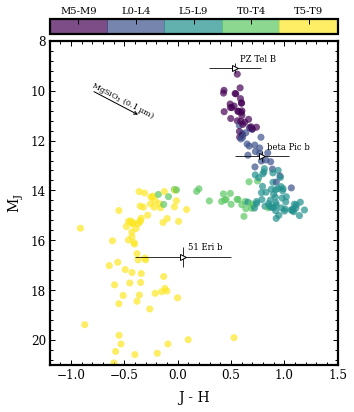

In [10]:
from IPython.display import Image
Image('color_mag.png')